**Import Files**

In [1]:
from google.colab import files
files.upload()
print("done") # this prevents the file from being printed

Saving Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx to Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx
done


In [2]:
file_path = "/content/Final data for Bidhan 4.4.23 _JB Tumor Cellularity Plot.xlsx" # replace with your file path

In [3]:
import pandas as pd
df = pd.read_excel(file_path)
df.head()

,Tumor_alterations,Tumor,MMR,Qcyte # Variants,Manual #variants,"Neoadjuvant 0=no, 1=yes","Variant seen 0=both, 1=Qcyte only, 2=manual only",Gene,Chromosome,Qcyte AF,...,%fat,%smooth muscle,%tumor epithelium within tissue,%stroma of tissue,%mucin of tissue,%necrosis of tisse,Lymphocytes per mm2 of carcinoma,%immature as percent of tissue,%inflamm as percent of tissue,%mature as percent of tissue
0,1.1,1.0,0.0,1.0,1.0,1,0.0,BRAF,chr7:g.140453136A>T,0.321,...,0.207213,7.723748,25.144656,51.769784,13.069075,6.116391,57.491775,33.177851,1.499643,17.053790
1,2.1,2.0,NaN,1.0,2.0,1,0.0,APC,chr5:g.112175216G>T,0.158,...,24.052758,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127
2,2.2,NaN,NaN,NaN,NaN,1,2.0,TP53,chr17:g.7578406C>T,NaN,...,24.052758,4.118637,0.452434,39.322542,58.520316,0.739673,87.083758,7.499392,0.229925,30.594127
3,3.1,3.0,0.0,4.0,2.0,1,0.0,KRAS,chr12:g.25398281C>T,0.337,...,0.327021,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125
4,3.2,NaN,NaN,NaN,NaN,1,0.0,APC,chr5:g.112175390C>T,0.704,...,0.327021,2.753866,29.696764,56.720071,3.168874,8.055224,84.246025,38.528831,6.463002,11.533125


# Variant Count Visualization

In [4]:
Qcyte_num_variant_column = "Qcyte # Variants" # Replace with your column name
Manual_num_variant_column = "Manual #variants" # Replace with your column name
Variant_seen_column = "Variant seen 0=both, 1=Qcyte only, 2=manual only" # Replace with your column name
Tumor_id = "Tumor"

In [5]:
df_count = df.dropna(subset=[Tumor_id, Variant_seen_column])

Qcyte_equal_Manual = (df_count[Qcyte_num_variant_column] == df_count[Manual_num_variant_column]).sum()
Qcyte_less_Manual = (df_count[Qcyte_num_variant_column] < df_count[Manual_num_variant_column]).sum()
Qcyte_greater_Manual = (df_count[Qcyte_num_variant_column] > df_count[Manual_num_variant_column]).sum()

print(f"Qcyte = Manual: {Qcyte_equal_Manual} \nQcyte > Manual: {Qcyte_greater_Manual} \nManual > Qcyte: {Qcyte_less_Manual}")

Qcyte = Manual: 28 
Qcyte > Manual: 15 
Manual > Qcyte: 1


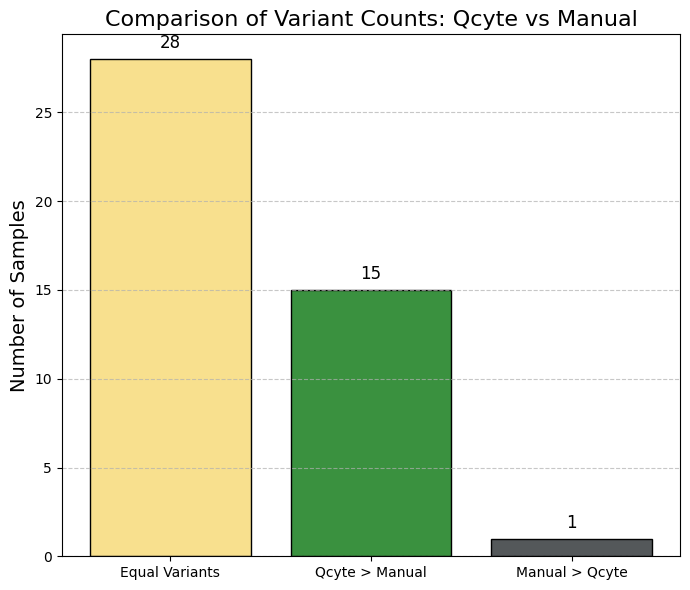

In [6]:
import matplotlib.pyplot as plt

counts = [Qcyte_equal_Manual, Qcyte_greater_Manual, Qcyte_less_Manual]
labels = ['Equal Variants', 'Qcyte > Manual', 'Manual > Qcyte']
colors = ['#F8E08E', '#3A913F', '#54585A']

fig, ax = plt.subplots(figsize=(7, 6))

bars = ax.bar(labels, counts, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

ax.set_ylabel('Number of Samples', fontsize=14)
ax.set_title('Comparison of Variant Counts: Qcyte vs Manual', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


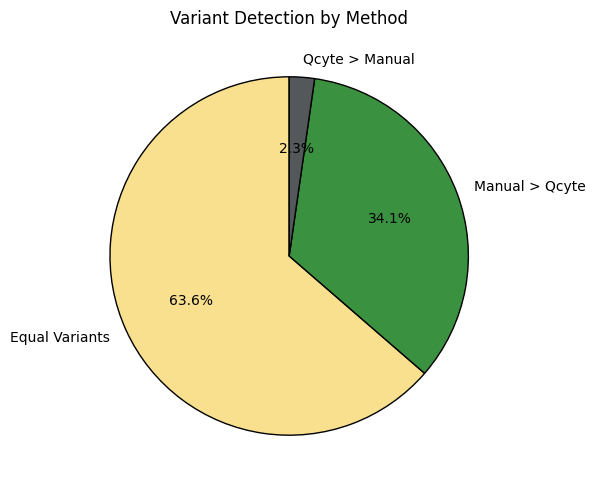

In [7]:
import matplotlib.pyplot as plt

detection_counts = {
    'Equal Variants': Qcyte_equal_Manual,
    'Manual > Qcyte': Qcyte_greater_Manual,
    'Qcyte > Manual': Qcyte_less_Manual
}

plt.figure(figsize=(6, 6))
plt.pie(
    detection_counts.values(),
    labels=detection_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#F8E08E', '#3A913F', '#54585A'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Variant Detection by Method')
plt.tight_layout()
plt.show()


# VAF Visualization

In [8]:
Qcyte_VAF_col = "Qcyte AF" # Replace with your column name
Manual_VAF_col = "Manual VAF" # Replace with your column name

Filtering

In [9]:
df_vaf = df.dropna(subset=[Qcyte_VAF_col, Manual_VAF_col]) # Removes all entrees with missing values for either Manual or Qcyte VAF

print(f"entries removed: {len(df) - len(df_vaf)}")
print(f"entries remaining: {len(df_vaf)}")

entries removed: 30
entries remaining: 111


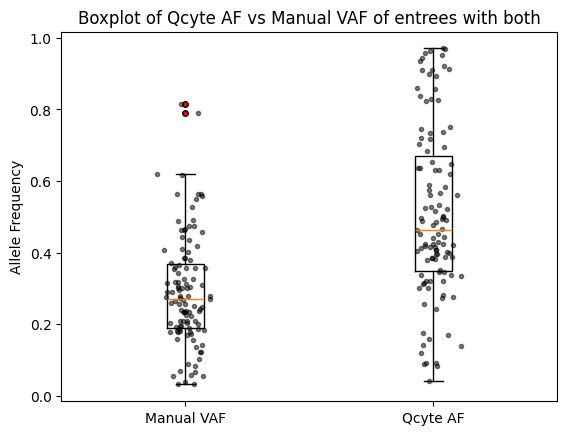

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Original boxplot
flier_props = dict(marker='.', markerfacecolor='red', markersize=8, linestyle='none')
plt.boxplot(
    [df_vaf[Manual_VAF_col].dropna(), df_vaf[Qcyte_VAF_col].dropna()],
    tick_labels=['Manual VAF','Qcyte AF'],
    flierprops=flier_props
)

# Overlay raw points
positions = [1, 2]
for i, data in enumerate([df_vaf[Manual_VAF_col].dropna(), df_vaf[Qcyte_VAF_col].dropna()]):
    y = data
    x = np.random.normal(positions[i], 0.04, size=len(y))  # jitter for visibility
    plt.plot(x, y, '.', alpha=0.5, color='black')

plt.ylabel('Allele Frequency')
plt.title('Boxplot of Qcyte AF vs Manual VAF of entrees with both')
plt.show()


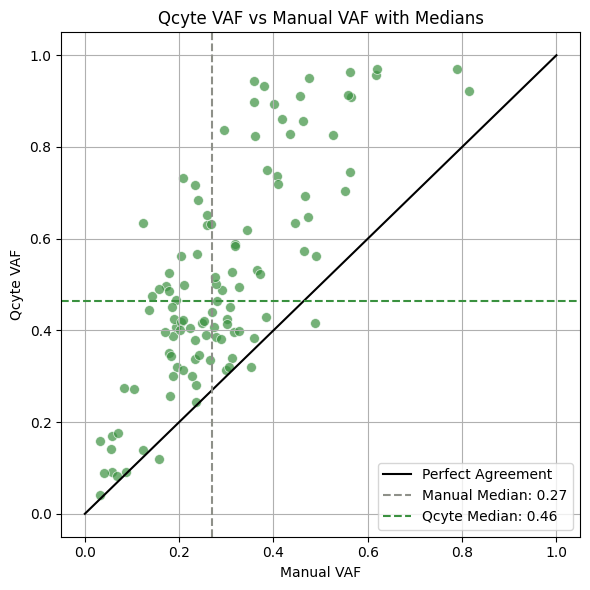

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

manual_median = df_vaf[Manual_VAF_col].median()
qcyte_median = df_vaf[Qcyte_VAF_col].median()

plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=Manual_VAF_col,
    y=Qcyte_VAF_col,
    data=df_vaf,
    alpha=0.7,
    s=50,
    color='#3A913F'
)

plt.plot([0, 1], [0, 1], linestyle='-', color='black', label='Perfect Agreement')

plt.axvline(manual_median, color='#8E9089', linestyle='--', label=f'Manual Median: {manual_median:.2f}')
plt.axhline(qcyte_median, color='#3A913F', linestyle='--', label=f'Qcyte Median: {qcyte_median:.2f}')

plt.xlabel('Manual VAF')
plt.ylabel('Qcyte VAF')
plt.title('Qcyte VAF vs Manual VAF with Medians')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


All points above the Perfect Agreement line represent Qcyte samples that detected a higher VAF than Manual. The inverse is true for points below the line.

In [ ]:
df_vaf['QcyteVAF / ManualVAF'] = df_vaf[Qcyte_VAF_col] / df_vaf[Manual_VAF_col]

<ipython-input-62-611a5733da1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaf['QcyteVAF / ManualVAF'] = df_vaf[Qcyte_VAF_col] / df_vaf[Manual_VAF_col]


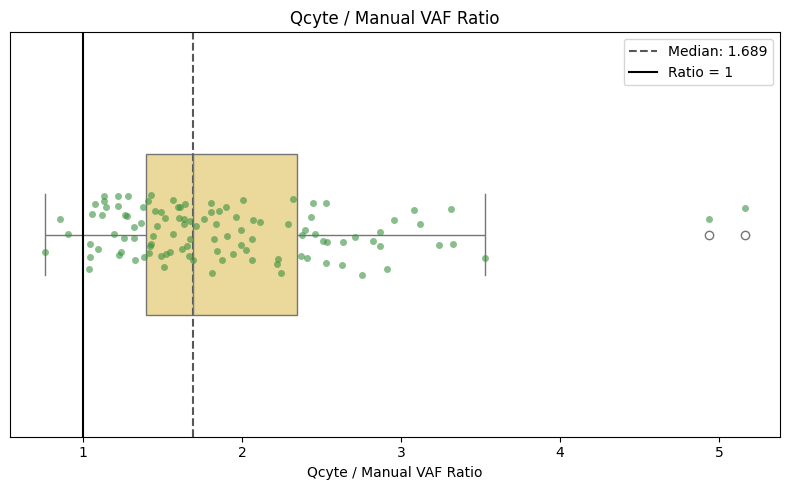

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

median_ratio = df_vaf['QcyteVAF / ManualVAF'].median()

plt.figure(figsize=(8, 5))

sns.boxplot(
    x='QcyteVAF / ManualVAF',
    data=df_vaf,
    color='#F8E08E',
    width=0.4
)

sns.stripplot(
    x='QcyteVAF / ManualVAF',
    data=df_vaf,
    color='#3A913F',
    size=5,
    alpha=0.6,
    jitter=True
)

plt.axvline(median_ratio, color='#54585A', linestyle='--', label=f'Median: {median_ratio:.3f}')

plt.axvline(1, color='black', linestyle='-', label='Ratio = 1')

plt.title('Qcyte / Manual VAF Ratio')
plt.xlabel('Qcyte / Manual VAF Ratio')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()


# Gene Count Visualization

In [ ]:
Gene_col = "Gene" # Replace with your column name
Variant_seen_col = "Variant seen 0=both, 1=Qcyte only, 2=manual only" # Replace with your column name


In [ ]:
genes = df[Gene_col].dropna().unique()
gene_dict = {}

for gene in genes:

    df_gene = df[df[Gene_col] == gene]

    gene_both = (df_gene[Variant_seen_col] == 0).sum()
    gene_Qcyte = (df_gene[Variant_seen_col] == 1).sum()
    gene_Manual = (df_gene[Variant_seen_col] == 2).sum()

    gene_dict[gene] = [gene_both, gene_Qcyte, gene_Manual]


In [ ]:
import pandas as pd

gene_df = pd.DataFrame.from_dict(
    gene_dict,
    orient='index',
    columns=['Both', 'QCPrecise Only', 'Manual Only']
)

gene_df.index.name = 'Gene'
gene_df = gene_df.reset_index()

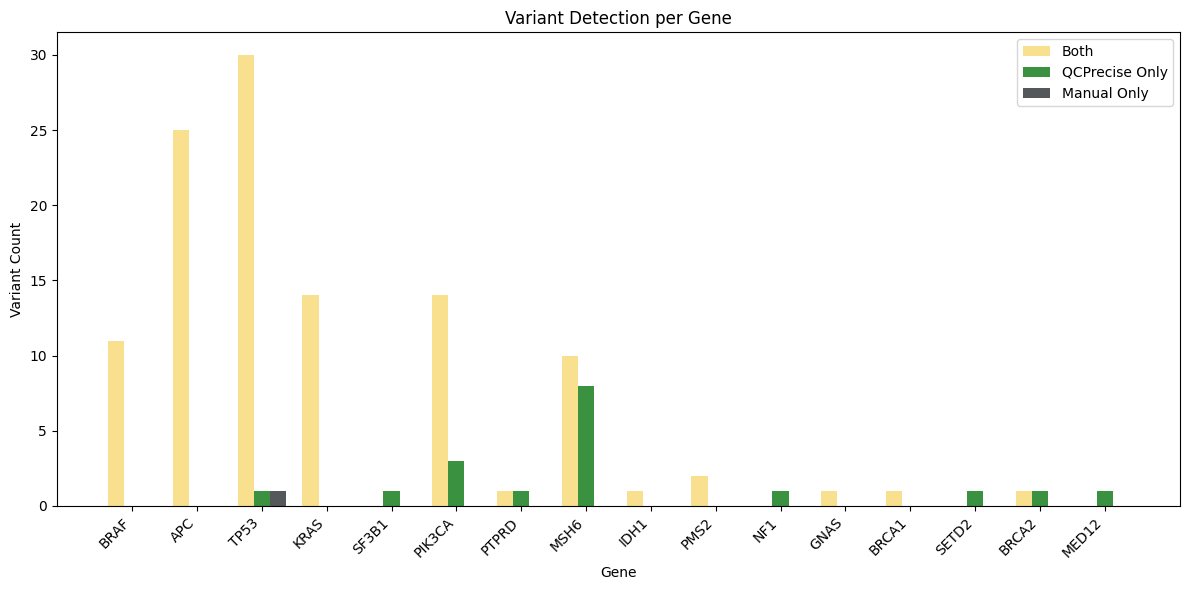

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
x = gene_df['Gene']
bar_width = 0.25
bar_positions = range(len(x))


plt.bar([i - bar_width for i in bar_positions], gene_df['Both'], width=bar_width, label='Both', color='#F8E08E')
plt.bar(bar_positions, gene_df['QCPrecise Only'], width=bar_width, label='QCPrecise Only', color='#3A913F')
plt.bar([i + bar_width for i in bar_positions], gene_df['Manual Only'], width=bar_width, label='Manual Only', color='#54585A')

plt.xticks(bar_positions, x, rotation=45, ha='right')
plt.xlabel("Gene")
plt.ylabel("Variant Count")
plt.title("Variant Detection per Gene")
plt.legend()
plt.tight_layout()
plt.show()


# Suspected Germline Visualization

In [ ]:
Qcyte_VAF_col = 'Qcyte AF' # Replace with your column name
Manual_VAF_col = 'Manual VAF' # Replace with your column name
Variant_seen_col = 'Variant seen 0=both, 1=Qcyte only, 2=manual only' # Replace with your column name

In [ ]:
df_both = df[df[Variant_seen_col] == 0]

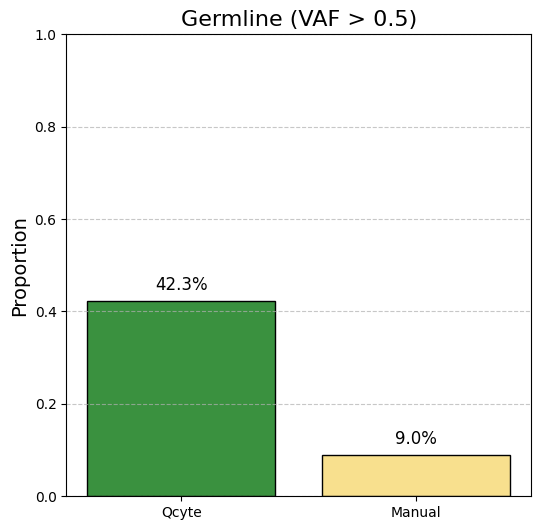

In [ ]:
import matplotlib.pyplot as plt

colA_above = ((df_both[Qcyte_VAF_col] > 0.5) & (~df_both[Manual_VAF_col].isna())).sum()
colB_above = ((df_both[Manual_VAF_col] > 0.5) & (~df_both[Qcyte_VAF_col].isna())).sum()

colA_valid = (~df_both[Qcyte_VAF_col].isna()).sum()
colB_valid = (~df_both[Manual_VAF_col].isna()).sum()

propA = colA_above / colA_valid
propB = colB_above / colB_valid

fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    ['Qcyte', 'Manual'],
    [propA, propB],
    color=['#3A913F', '#F8E08E'],
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

ax.set_ylim(0, 1)
ax.set_ylabel('Proportion', fontsize=14)
ax.set_title('Germline (VAF > 0.5)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Visualization of Germline + Gene Count

In [ ]:
Qcyte_VAF_col = 'Qcyte AF' # Replace with your column name
Manual_VAF_col = 'Manual VAF' # Replace with your column name
Variant_seen_col = 'Variant seen 0=both, 1=Qcyte only, 2=manual only' # Replace with your column name
Gene_col = 'Gene' # Replace with your column name

In [ ]:
df_both = df[df[Variant_seen_col] == 0]

In [ ]:
df_both.loc[:, 'Germline_Q'] = df_both[Qcyte_VAF_col] > 0.5
df_both.loc[:, 'Germline_M'] = df_both[Manual_VAF_col] > 0.5


In [ ]:
manual_higher = df_both[
    (df_both[Manual_VAF_col] > df_both[Qcyte_VAF_col]) |  df_both[Qcyte_VAF_col].isna() & df_both[Manual_VAF_col].notna()
]

qcyte_higher = df_both[
    (df_both[Qcyte_VAF_col] > df_both[Manual_VAF_col]) |  df_both[Qcyte_VAF_col].notna() & df_both[Manual_VAF_col].isna()
]

qcyte_germ = qcyte_higher[(qcyte_higher['Germline_Q'] == True) & (qcyte_higher['Germline_M'] == False)]

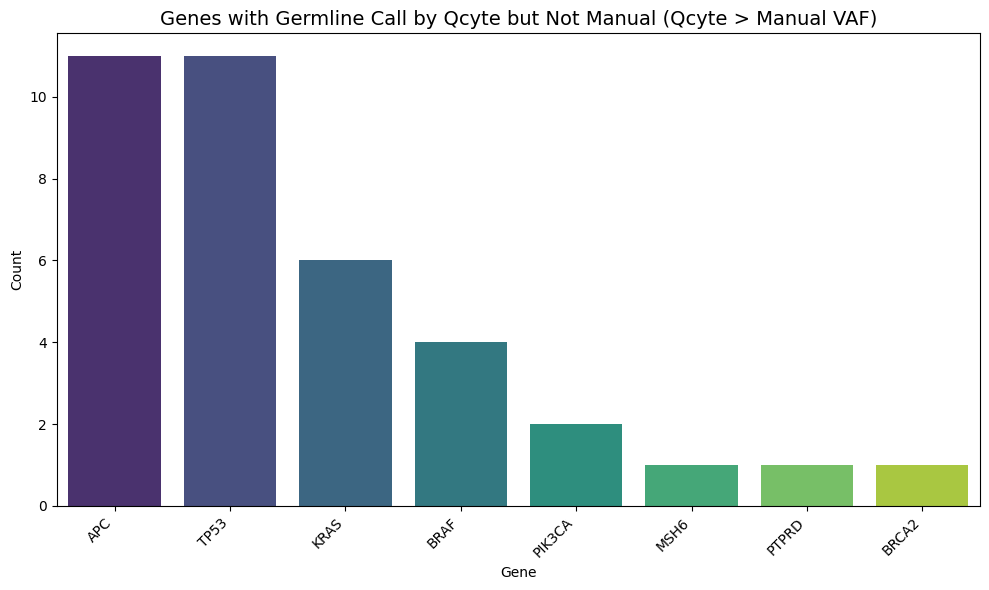

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gene_counts = qcyte_germ[Gene_col].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gene_counts.index, y=gene_counts.values, palette='viridis', hue=gene_counts.index)

plt.title('Genes with Germline Call by Qcyte but Not Manual (Qcyte > Manual VAF)', fontsize=14)
plt.xlabel('Gene')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
df_calls = df_both.dropna(subset=['Germline_Q', 'Germline_M'], how='all')

df_calls['Call_Qcyte'] = df_calls['Germline_Q'].map({True: 'Germline', False: 'Somatic'})
df_calls['Call_Manual'] = df_calls['Germline_M'].map({True: 'Germline', False: 'Somatic'})

df_melted = df_calls.melt(
    id_vars='Gene',
    value_vars=['Call_Qcyte', 'Call_Manual'],
    var_name='Method',
    value_name='Call'
)

df_melted['Method'] = df_melted['Method'].map({'Call_Qcyte': 'Qcyte', 'Call_Manual': 'Manual'})
df_melted['Method_Call'] = df_melted['Method'] + ' - ' + df_melted['Call']
summary = df_melted.groupby(['Method', 'Call']).size().unstack(fill_value=0)
counts = df_melted.groupby(['Gene', 'Method', 'Call']).size().reset_index(name='Count')
pivoted = counts.pivot_table(index=['Gene', 'Method'], columns='Call', values='Count', fill_value=0).reset_index()

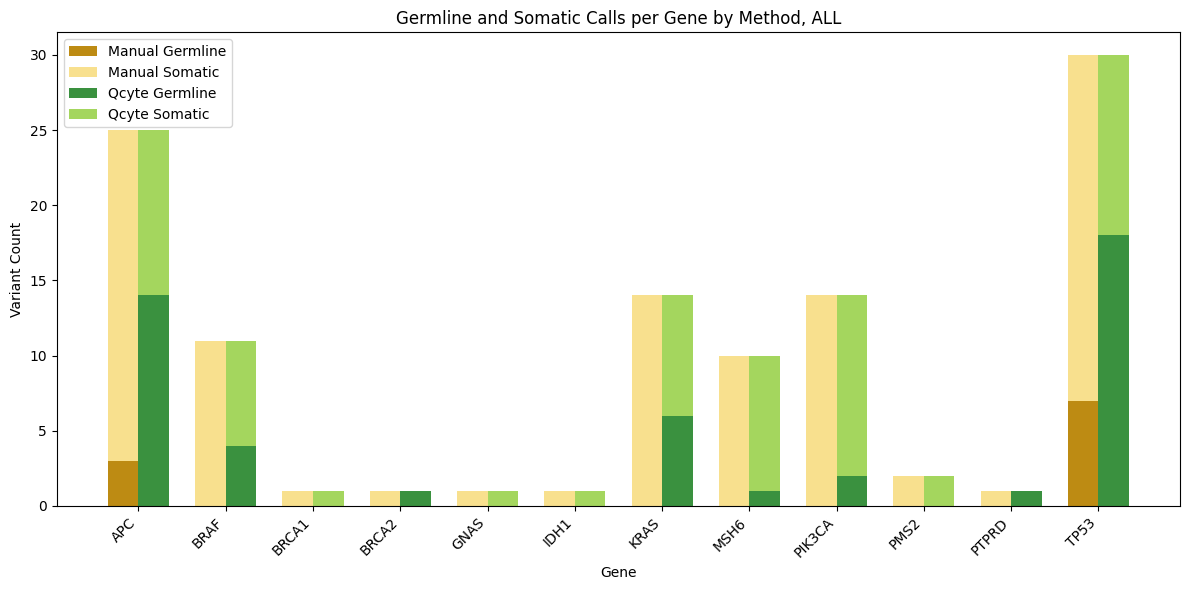

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivoted.sort_values(by='Gene', inplace=True)

genes = pivoted['Gene'].unique()
methods = ['Manual', 'Qcyte']
x = np.arange(len(genes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

colors = {
    'Manual Germline': '#BD8B13',
    'Manual Somatic': '#F8E08E',
    'Qcyte Germline': '#3A913F',
    'Qcyte Somatic': '#A4D65E'
}

for i, method in enumerate(methods):
    subset = pivoted[pivoted['Method'] == method]
    germline = subset['Germline']
    somatic = subset['Somatic']

    germline_color = colors[f'{method} Germline']
    somatic_color = colors[f'{method} Somatic']

    bar1 = ax.bar(x + i*width, germline, width, label=f'{method} Germline', color=germline_color)
    bar2 = ax.bar(x + i*width, somatic, width, bottom=germline, label=f'{method} Somatic', color=somatic_color)

ax.set_xlabel('Gene')
ax.set_ylabel('Variant Count')
ax.set_title('Germline and Somatic Calls per Gene by Method, ALL')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(genes, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()
